# 🦠 COVID-19 Data Analytics Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv(r"C:\Users\MY WORLD\Downloads\countries-aggregated.csv")
df.head()


,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [6]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       161568 non-null  object
 1   Country    161568 non-null  object
 2   Confirmed  161568 non-null  int64 
 3   Recovered  161568 non-null  int64 
 4   Deaths     161568 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.2+ MB


,Confirmed,Recovered,Deaths
count,1.615680e+05,1.615680e+05,161568.000000
mean,7.361569e+05,1.453967e+05,13999.436089
std,3.578884e+06,9.748275e+05,59113.581271
min,0.000000e+00,0.000000e+00,0.000000
25%,1.220000e+03,0.000000e+00,17.000000
50%,2.369200e+04,1.260000e+02,365.000000
75%,2.558420e+05,1.797225e+04,4509.000000
max,8.062512e+07,3.097475e+07,988609.000000


In [7]:
df.isnull().sum()


Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [13]:
df['Active'] = df['Confirmed'] - df['Recovered'] - df['Deaths']
df.head()


,Date,Country,Confirmed,Recovered,Deaths,Active
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0


In [14]:
global_stats = df.groupby('Date')[['Confirmed', 'Recovered', 'Deaths', 'Active']].sum()
global_stats.tail()


,Confirmed,Recovered,Deaths,Active
Date,,,,
2022-04-12,500880363,0,6185040,494695323
2022-04-13,501920234,0,6189593,495730641
2022-04-14,502892186,0,6193401,496698785
2022-04-15,503606396,0,6195647,497410749
2022-04-16,504155459,0,6197159,497958300


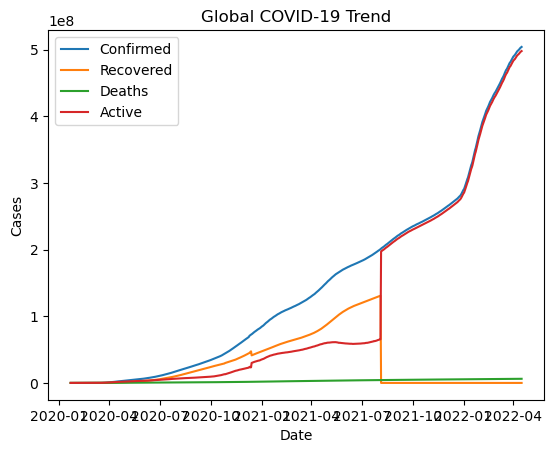

In [15]:
plt.figure()
plt.plot(global_stats.index, global_stats['Confirmed'])
plt.plot(global_stats.index, global_stats['Recovered'])
plt.plot(global_stats.index, global_stats['Deaths'])
plt.plot(global_stats.index, global_stats['Active'])

plt.title("Global COVID-19 Trend")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend(["Confirmed", "Recovered", "Deaths", "Active"])
plt.show()


  Confirmed cases increase exponentially

Recovery rate improves over time

Death curve flattens later

# Top 10 Most Affected Countries

In [17]:
latest_date = df['Date'].max()

latest_data = df[df['Date'] == latest_date]

top_countries = latest_data.sort_values(by='Confirmed', ascending=False).head(10)
top_countries[['Country', 'Confirmed', 'Deaths']]


,Country,Confirmed,Deaths
150143,US,80625120,988609
66095,India,43042097,521751
20399,Brazil,30250077,662185
52223,France,27874269,145159
55487,Germany,23416663,132942
153407,United Kingdom,21916961,172014
119135,Russia,17801103,365774
76703,"Korea, South",16305752,21092
70991,Italy,15659835,161602
149327,Turkey,14991669,98551


# Bar Plot (Top Countries)

C:\Users\MY WORLD\AppData\Local\Temp\ipykernel_32044\1510956742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Country', data=top_countries,palette='rainbow')


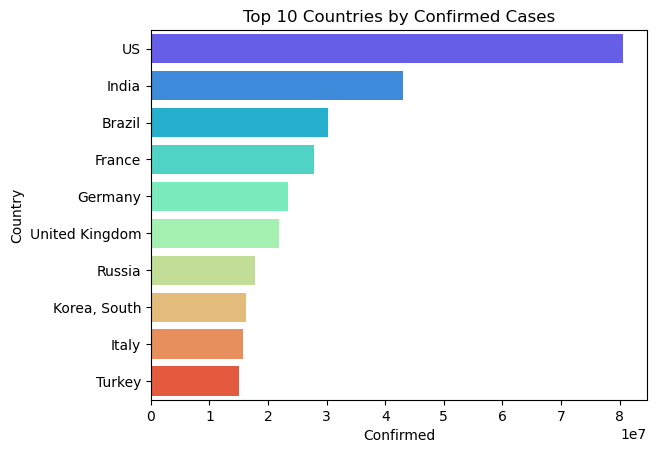

In [22]:
plt.figure()
sns.barplot(x='Confirmed', y='Country', data=top_countries,palette='rainbow')
plt.title("Top 10 Countries by Confirmed Cases")
plt.show()


# Individual Country Analysis (India)

In [24]:
india = df[df['Country'] == 'India']
india.head()


,Date,Country,Confirmed,Recovered,Deaths,Active
65280,2020-01-22,India,0,0,0,0
65281,2020-01-23,India,0,0,0,0
65282,2020-01-24,India,0,0,0,0
65283,2020-01-25,India,0,0,0,0
65284,2020-01-26,India,0,0,0,0


# India Trend

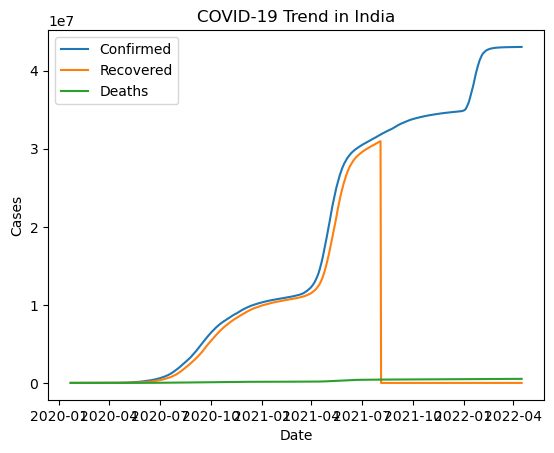

In [25]:
plt.figure()
plt.plot(india['Date'], india['Confirmed'])
plt.plot(india['Date'], india['Recovered'])
plt.plot(india['Date'], india['Deaths'])

plt.title("COVID-19 Trend in India")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend(["Confirmed", "Recovered", "Deaths"])
plt.show()


# Death Rate Analysis

In [28]:
df['Death_Rate'] = (df['Deaths'] / df['Confirmed']) * 100 
df.head()


,Date,Country,Confirmed,Recovered,Deaths,Active,Death_Rate
0,2020-01-22,Afghanistan,0,0,0,0,NaN
1,2020-01-23,Afghanistan,0,0,0,0,NaN
2,2020-01-24,Afghanistan,0,0,0,0,NaN
3,2020-01-25,Afghanistan,0,0,0,0,NaN
4,2020-01-26,Afghanistan,0,0,0,0,NaN


In [39]:
death_rate = df.sort_values(by='Death_Rate', ascending=False).head(20)

death_rate[['Country', 'Death_Rate']]




,Country,Death_Rate
136323,Sudan,inf
60434,Guyana,100.0
60436,Guyana,100.0
60435,Guyana,100.0
123254,San Marino,100.0
66940,Iran,100.0
123255,San Marino,100.0
136324,Sudan,100.0
136325,Sudan,100.0
113469,Peru,100.0


# Healthcare Stress Indicator (Hidden Insight) 
### High Active Cases / Confirmed Cases ratio = more pressure.

In [42]:
df['Active_Ratio'] = df['Active'] / df['Confirmed'].replace(0, np.nan)

stress = (
    df.groupby('Country')['Active_Ratio']
      .max()
      .sort_values(ascending=True)
      .head(20)
)

stress


Country
Sudan          0.940867
Peru           0.941860
Iran           0.980614
Guyana         0.980858
China          0.992208
San Marino     0.992818
Thailand       0.993332
Afghanistan    1.000000
Armenia        1.000000
Australia      1.000000
Austria        1.000000
Azerbaijan     1.000000
Angola         1.000000
Antarctica     1.000000
Algeria        1.000000
Albania        1.000000
Belarus        1.000000
Belgium        1.000000
Belize         1.000000
Benin          1.000000
Name: Active_Ratio, dtype: float64

High active ratio = delayed recovery, limited facilities

Useful for healthcare planning

# Fatality Trend Stability (Risk Signal) 
## High standard deviation in death rate = inconsistent care/reporting.

In [43]:
fatality_volatility = (
    df.groupby('Country')['Death_Rate']
      .std()
      .sort_values(ascending=False)
      .head(10)
)

fatality_volatility


Country
Vanuatu           10.957293
Philippines        6.940497
Guyana             6.824951
San Marino         6.519588
Yemen              5.908674
Nicaragua          5.879018
Belgium            5.182883
Peru               5.158730
France             5.002212
United Kingdom     4.862991
Name: Death_Rate, dtype: float64

High volatility signals under-reporting or system collapse phases

# Daily New Cases Trend (Wave Detection)

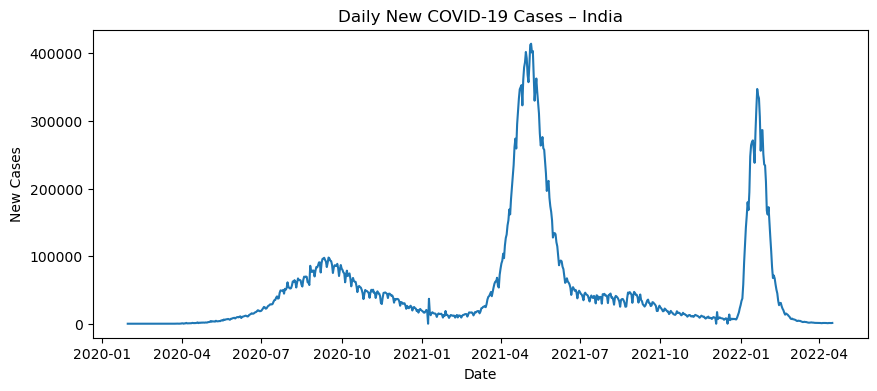

In [44]:
df['Daily_Cases'] = df.groupby('Country')['Confirmed'].diff()

india = df[df['Country'] == 'India'].dropna()

plt.figure(figsize=(10,4))
plt.plot(india['Date'], india['Daily_Cases'])
plt.title("Daily New COVID-19 Cases – India")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.show()


# Country-wise Daily New Cases (Wave Detection)

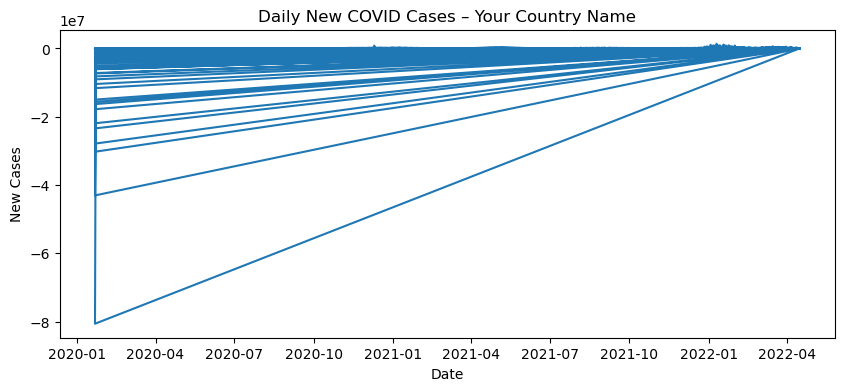

In [49]:
country = "Your Country Name"  # Replace with the actual country name you're analyzing

df['Daily_Cases'] = df['Confirmed'].diff()

plt.figure(figsize=(10,4))
plt.plot(df['Date'], df['Daily_Cases'])
plt.title(f"Daily New COVID Cases – {country}")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.show()

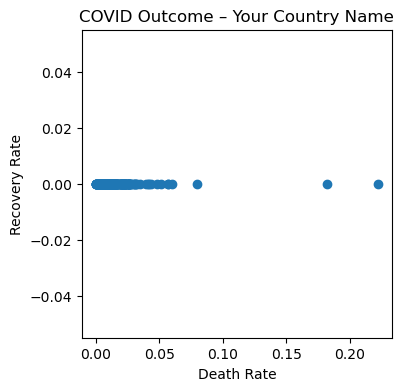

In [55]:
latest = df[df['Date'] == df['Date'].max()]

plt.figure(figsize=(4,4))
plt.scatter(
    latest['Deaths'] / latest['Confirmed'],
    latest['Recovered'] / latest['Confirmed']
)

plt.xlabel("Death Rate")
plt.ylabel("Recovery Rate")
plt.title(f"COVID Outcome – {country}")
plt.show()


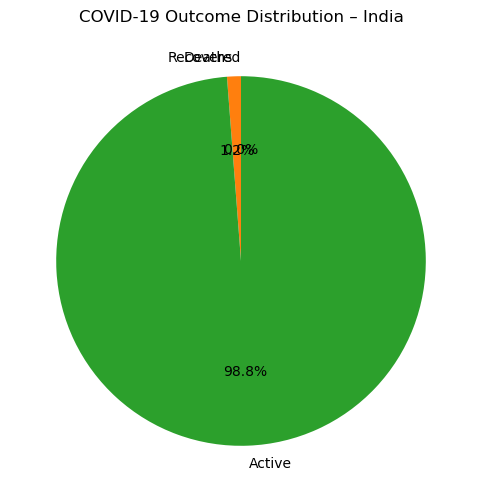

In [60]:
country = "India"

c = df[df['Country'] == country]
latest = c[c['Date'] == c['Date'].max()]

labels = ['Recovered', 'Deaths', 'Active']
values = [
    latest['Recovered'].values[0],
    latest['Deaths'].values[0],
    latest['Active'].values[0]
]

plt.figure(figsize=(8,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title(f"COVID-19 Outcome Distribution – {country}")
plt.show()


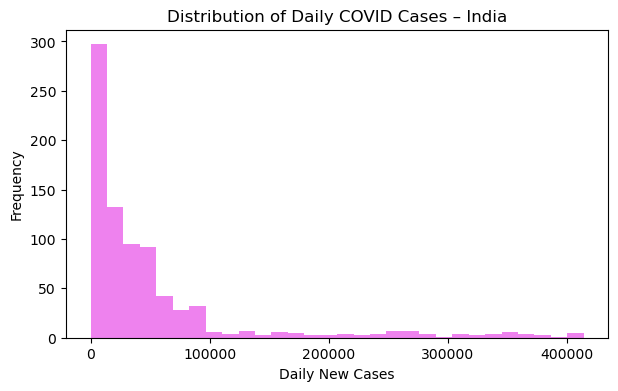

In [69]:
df = df[df['Country'] == country].copy()
df['Daily_Cases'] = df['Confirmed'].diff()

plt.figure(figsize=(7,4))
plt.hist(df['Daily_Cases'].dropna(), bins=30, color='violet')  # Changed palette to color
plt.xlabel("Daily New Cases")
plt.ylabel("Frequency")
plt.title(f"Distribution of Daily COVID Cases – {country}")
plt.show()

# 🌊  COUNTRY-WISE KDE PLOT

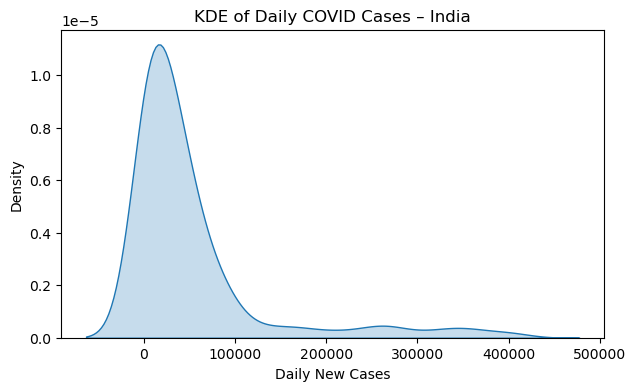

In [70]:
plt.figure(figsize=(7,4))
sns.kdeplot(c['Daily_Cases'].dropna(), fill=True)
plt.xlabel("Daily New Cases")
plt.ylabel("Density")
plt.title(f"KDE of Daily COVID Cases – {country}")
plt.show()


# Conclusion

Conclusion:
This project analyzed global and country-wise COVID-19 data to uncover meaningful trends and outcomes.
Daily case analysis and moving averages revealed multiple infection waves and intervention impacts.
Recovery and death rate analysis highlighted differences in healthcare efficiency across countries.
Distribution analysis using histograms and KDE plots showed outbreak severity and variability.
Country-wise visualizations summarized final pandemic outcomes clearly and effectively.
Overall, the project demonstrates how data analytics can convert raw health data into actionable insights.